## Jon intro to python, lesson 4 (9/24/17)

### in lesson three, we covered loading built-in datasets, inspecting/manipulating data in dataframes, producing summary statistics, exporting data, and an intro to plotting

---

### let's take a look at a new dataset of Boston housing prices

In [1]:
import pandas as pd
from sklearn import datasets
import numpy as np
%matplotlib inline

In [2]:
boston = datasets.load_boston()
data = boston.data
column_names = boston.feature_names
#species_names = boston.target_names

MEDV = boston.target # median values (target)

boston_df = pd.DataFrame(boston.data, columns= column_names)
boston_df['MEDV'] = MEDV

In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# how many observations?
num_rows = len(boston_df)
print('number of observations (houses):', num_rows)
# get column names (features):
num_cols = len(boston_df.columns)
print('number of features:', num_cols)
print("features:", list(boston_df.columns))
# see: http://scikit-learn.org/stable/datasets/ for data dictionary

number of observations (houses): 506
number of features: 14
features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [40]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### let's explore some of the features w/ more detailed histograms:

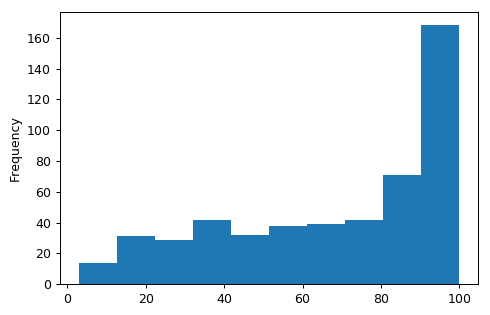

In [10]:
import matplotlib.pyplot as plt
# create new figure, axes instances.
fig=plt.figure(dpi=90)
boston_df.AGE.plot.hist()

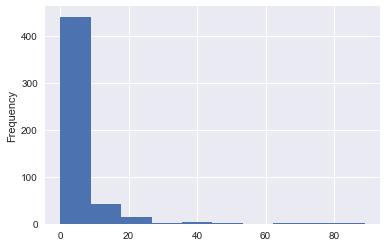

In [105]:
boston_df.CRIM.plot.hist()

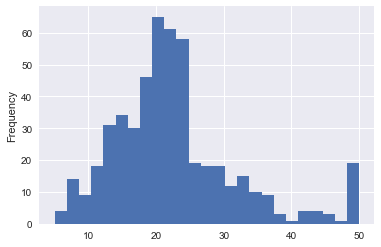

In [110]:
boston_df.MEDV.plot.hist(bins=25)

### let's add some detail to the plot:

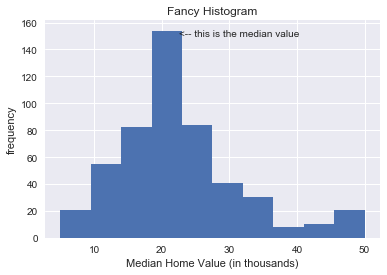

In [119]:
import matplotlib.pyplot as plt
blah = plt.hist(boston_df.MEDV)
plt.xlabel('Median Home Value (in thousands)')
plt.ylabel('frequency')
plt.title('Fancy Histogram')
plt.text(boston_df.MEDV.mean(), 150, r'<-- this is the median value')
# plt.text(40, 110, r'<-- this is the median value')
plt.grid(True)
plt.show()

### adjusting bins w/in a histogram:

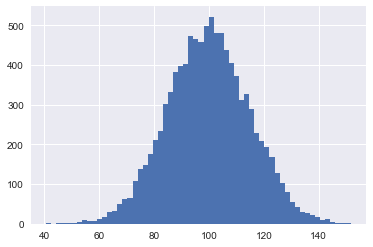

In [123]:
import matplotlib.pyplot as plt
# Fixing random state for reproducibility
# np.random.seed(19680801)

# mu, sigma = 100, 15
# x = mu + sigma * np.random.randn(10000)

# # the histogram of the data
# n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


# plt.xlabel('Smarts')
# plt.ylabel('Probability')
# plt.title('Histogram of IQ')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])
# plt.grid(True)
# plt.show()

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

blah = plt.hist(x, bins=60)
plt.show()

### let's see some scatterplots:

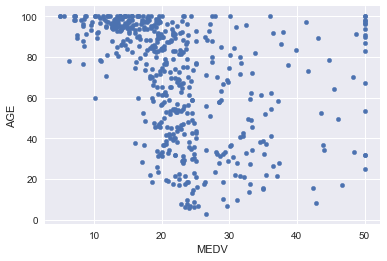

In [124]:
boston_df.plot.scatter(x='MEDV', y='AGE')

### what if we want a regression line on the above plot?

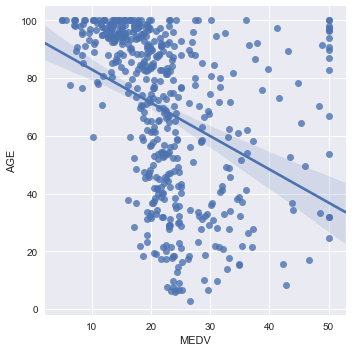

In [125]:
import seaborn as sns
sns.lmplot(x='MEDV',y='AGE',data=boston_df,fit_reg=True)

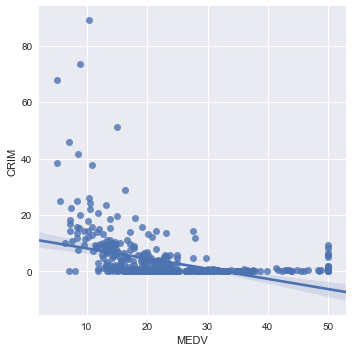

In [126]:
sns.lmplot(x='MEDV',y='CRIM',data=boston_df,fit_reg=True)

### bar plots:

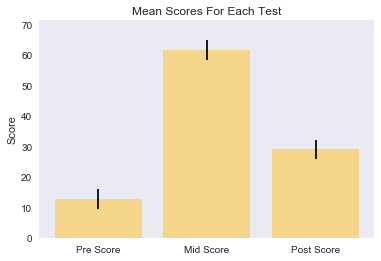

In [127]:
# barplot in matplotlib:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'pre_score': [4, 24, 31, 2, 3],
        'mid_score': [25, 94, 57, 62, 70],
        'post_score': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'pre_score', 'mid_score', 'post_score'])
df

# Create a list of the mean scores for each variable
mean_values = [df['pre_score'].mean(), df['mid_score'].mean(), df['post_score'].mean()]

# Create a list of variances, which are set at .25 above and below the score
variance = [df['pre_score'].mean() * 0.25, df['pre_score'].mean() * 0.25, df['pre_score'].mean() * 0.25]

# Set the bar labels
bar_labels = ['Pre Score', 'Mid Score', 'Post Score']

# Create the x position of the bars
x_pos = list(range(len(bar_labels)))

# Create the plot bars
# In x position
plt.bar(x_pos,
        # using the data from the mean_values
        mean_values, 
        # with a y-error lines set at variance
        yerr=variance, 
        # aligned in the center
        align='center',
        # with color
        color='#FFC222',
        # alpha 0.5
        alpha=0.5)

# add a grid
plt.grid()

# set height of the y-axis
max_y = max(zip(mean_values, variance)) # returns a tuple, here: (3, 5)
plt.ylim([0, (max_y[0] + max_y[1]) * 1.1])

# set axes labels and title
plt.ylabel('Score')
plt.xticks(x_pos, bar_labels)
plt.title('Mean Scores For Each Test')

plt.show()

### using seaborn:

In [128]:
# let's get some group data:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [77]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


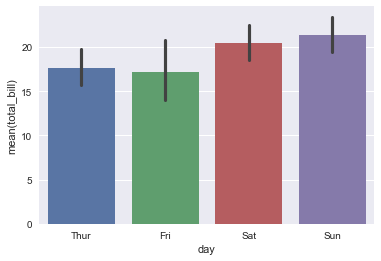

In [131]:
ax = sns.barplot(x="day", y="total_bill", data=tips)

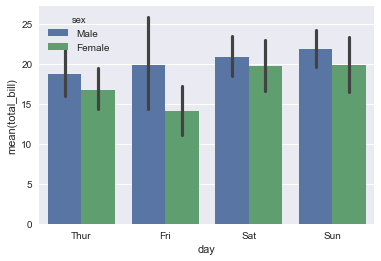

In [136]:
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

### line plot using pandas/default:

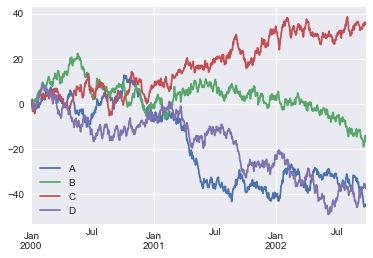

In [137]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000)) # create random timeseries
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot();

### line plot using seaborn:

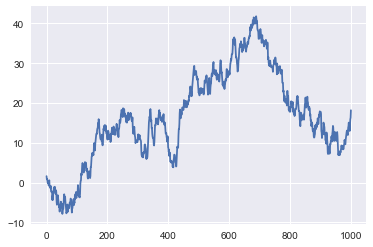

In [138]:
sns.set_style("darkgrid")
plt.plot(np.cumsum(np.random.randn(1000,1)))
plt.show()

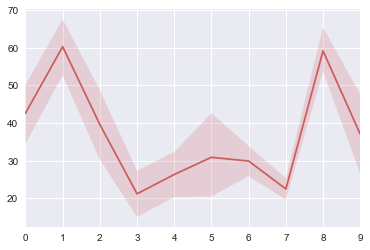

In [139]:
# timeseries data:

data = {'date': ['2014-05-01 18:47:05.069722', '2014-05-01 18:47:05.119994', '2014-05-02 18:47:05.178768', '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.280592', '2014-05-03 18:47:05.332662', '2014-05-03 18:47:05.385109', '2014-05-04 18:47:05.436523', '2014-05-04 18:47:05.486877'], 
        'deaths_regiment_1': [34, 43, 14, 15, 15, 14, 31, 25, 62, 41],
        'deaths_regiment_2': [52, 66, 78, 15, 15, 5, 25, 25, 86, 1],
        'deaths_regiment_3': [13, 73, 82, 58, 52, 87, 26, 5, 56, 75],
        'deaths_regiment_4': [44, 75, 26, 15, 15, 14, 54, 25, 24, 72],
        'deaths_regiment_5': [25, 24, 25, 15, 57, 68, 21, 27, 62, 5],
        'deaths_regiment_6': [84, 84, 26, 15, 15, 14, 26, 25, 62, 24],
        'deaths_regiment_7': [46, 57, 26, 15, 15, 14, 26, 25, 62, 41]}
df = pd.DataFrame(data, columns = ['date', 'battle_deaths', 'deaths_regiment_1', 'deaths_regiment_2',
                                   'deaths_regiment_3', 'deaths_regiment_4', 'deaths_regiment_5',
                                   'deaths_regiment_6', 'deaths_regiment_7'])
df = df.set_index(df.date)

sns.tsplot([df.deaths_regiment_1, df.deaths_regiment_2, df.deaths_regiment_3, df.deaths_regiment_4,
            df.deaths_regiment_5, df.deaths_regiment_6, df.deaths_regiment_7], color="indianred")

### downloading new modules/packages; let's get folium and make a map plot:

In [142]:
import folium

In [151]:
chicago_coordinates = [41.8781, -87.6298]
m = folium.Map(location=chicago_coordinates, zoom_start=11)
wilson_coordinates = [41.964273, -87.657588]
folium.RegularPolygonMarker(location=wilson_coordinates, popup='Wilson Station',
                   fill_color='#3186cc', number_of_sides=6, radius=10).add_to(m)
wormhole_coords = [41.908477, -87.674550]
folium.CircleMarker(location=wormhole_coords, radius=1.5,
                    popup='current location', color='#3186cc',
                    fill_color='#3186cc').add_to(m)

m